In [29]:
import csv
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [30]:
csv_file = Path("../p_e.csv")

In [40]:
n_e = []
sub_l = []
data = []
with open(csv_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    # Extract column headers
    headers = next(reader)
    n_e = [float(h) for h in headers[1:]]

    for row in reader:
        sub_l.append(float(row[0]))
        # Convert the rest to float, handling comma as decimal separator
        float_row = [float(val.replace(',', '.')) for val in row[1:] if val]
        data.append(float_row)


data_array = np.array(data)


In [53]:
N_E, SUB_L = np.meshgrid(n_e, sub_l)
mask = SUB_L < N_E
e_spacing = np.ma.masked_where(mask, data_array)

Min: 0.5, Max: 6.0
6
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5]


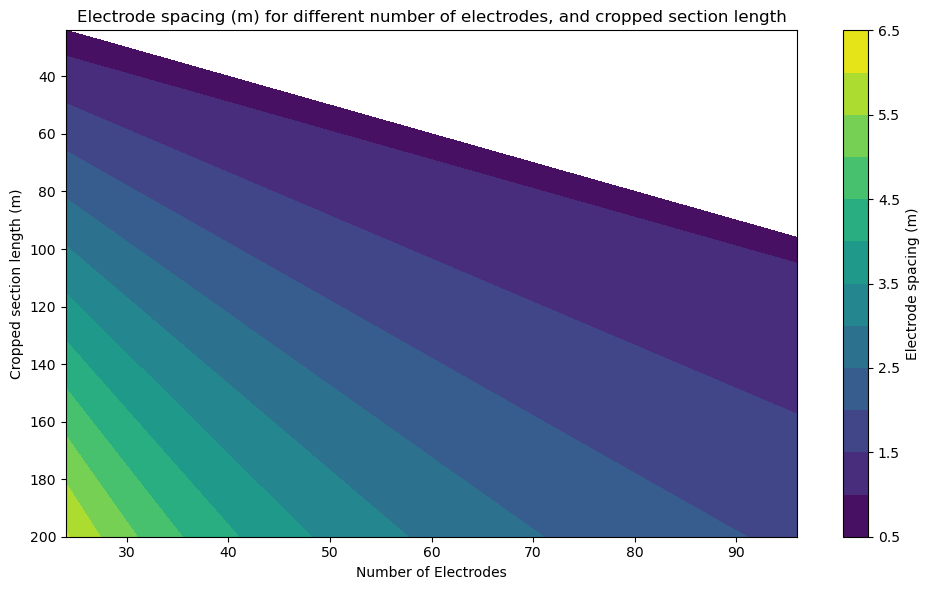

In [54]:
# Plot contour map
plt.figure(figsize=(10, 6))
vmin = round(e_spacing.min() * 2) / 2
vmax = round(e_spacing.max() * 2) / 2
print(f"Min: {vmin}, Max: {vmax}")
print(int(vmax - vmin) + 1)
levels = np.arange(vmin, vmax + 1, 0.5)
print(levels)
cp = plt.contourf(N_E, SUB_L, e_spacing, levels=levels, cmap='viridis')
plt.colorbar(cp, label="Electrode spacing (m)")
plt.title("Electrode spacing (m) for different number of electrodes, and cropped section length")
plt.xlabel("Number of Electrodes")
plt.ylabel("Cropped section length (m)")
plt.gca().invert_yaxis()  # Optional: deeper values downwards
plt.tight_layout()
plt.show()

In [63]:
def custom_log_taper(logx):
    """
    Custom taper function based on ln(x):
      - 0 for x < 1
      - Ramp up to 1 from ln(1) to ln(20)
      - 1 from ln(20) to ln(2000)
      - Ramp down to 0 from ln(2000) to ln(50000)
    """
    logx = np.asarray(logx)
    y = np.zeros_like(logx)

    # Define log boundaries
    x_p_min_1 = np.log(1)
    x_p_max_1 = np.log(20)
    x_p_max_2 = np.log(2000)
    x_p_min_2 = np.log(50000)

    # Ramp up: x_p_min_1 to x_p_max_1
    ramp_up = (logx >= x_p_min_1) & (logx < x_p_max_1)
    y[ramp_up] = 0.5 * (1 - np.cos(np.pi * (logx[ramp_up] - x_p_min_1) / (x_p_max_1 - x_p_min_1)))

    # Plateau: x_p_max_1 to x_p_max_2
    plateau = (logx >= x_p_max_1) & (logx < x_p_max_2)
    y[plateau] = 1.0

    # Ramp down: x_p_max_2 to x_p_min_2
    ramp_down = (logx >= x_p_max_2) & (logx < x_p_min_2)
    y[ramp_down] = 0.5 * (1 + np.cos(np.pi * (logx[ramp_down] - x_p_max_2) / (x_p_min_2 - x_p_max_2)))

    return y

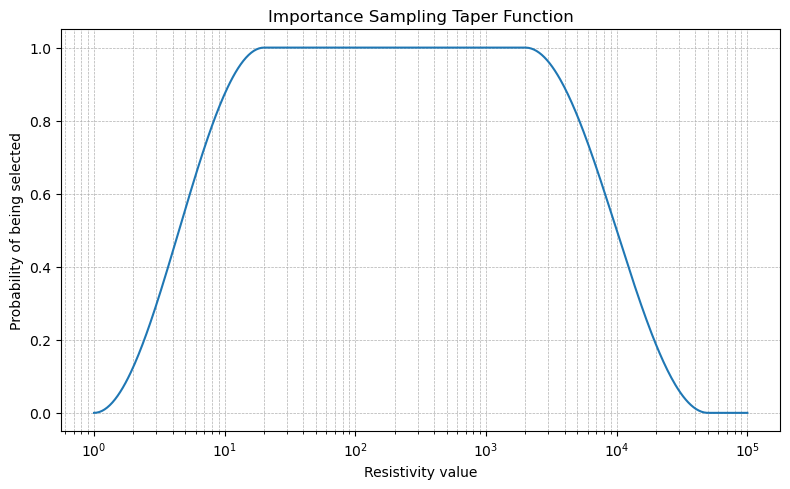

In [66]:
# Create x-values from 0.1 to 100,000, evenly spaced in log-10 space
x = np.logspace(0, 5, 500)
logx = np.log(x)
y = custom_log_taper(logx)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.xscale('log')
plt.xlabel('Resistivity value')
plt.ylabel('Probability of being selected')
plt.title('Importance Sampling Taper Function')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()